## Checking model performance

Load the foundational MACE models

In [1]:
from mace.calculators import MACECalculator

mace_mpa_0 = MACECalculator(model_paths="/Users/soni_aman/Documents/Master Thesis/Sir_Sihna_Sign/Fine_tune_dir/Models/mace-mpa-0-medium.model", device="cpu", default_dtype="float64")
calc_small = MACECalculator(model_paths="/Users/soni_aman/Documents/Master Thesis/Sir_Sihna_Sign/Fine_tune_dir/Models/small_MACE_MP_0.model", device="cpu", default_dtype="float64")
calc_large = MACECalculator(model_paths="/Users/soni_aman/Documents/Master Thesis/Sir_Sihna_Sign/Fine_tune_dir/Models/large_MACE_MP_0.model", device="cpu", default_dtype="float64")

/Users/soni_aman/anaconda3/envs/thesis_all/lib/python3.13/site-packages/e3nn/o3/_wigner.py:10: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  _Jd, _W3j_flat, _W3j_indices = torch.load(os.path.join(os.path.dirname(__file__), 'constants.pt'))


cuequivariance or cuequivariance_torch is not available. Cuequivariance acceleration will be disabled.


/Users/soni_aman/anaconda3/envs/thesis_all/lib/python3.13/site-packages/mace/calculators/mace.py:139: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_location=device)
/Users/soni_aman/anaconda3/envs/thesis_all/lib/python3.13/site-packages/mace/calculators/mace.py:139: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_location=device)
/Users/soni_aman/anaconda3/envs/thesis_all/lib/python3.13/site-packages/mace/calculators/mace.py:139: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_location=device)


Load the trained models

In [2]:
naive_210_30 = MACECalculator(model_paths="/Users/soni_aman/Documents/Master Thesis/Sir_Sihna_Sign/Fine_tune_dir/Models/epch30_210_compiled.model", device="cpu", default_dtype="float64")
naive_210_100 = MACECalculator(model_paths="/Users/soni_aman/Documents/Master Thesis/Sir_Sihna_Sign/Fine_tune_dir/Models/epch100_210_compiled.model", device="cpu", default_dtype="float64")
naive_314 = MACECalculator(model_paths="/Users/soni_aman/Documents/Master Thesis/Sir_Sihna_Sign/Fine_tune_dir/Models/naive_314_compiled.model", device="cpu", default_dtype="float64")
scratch_314_avg = MACECalculator(model_paths="/Users/soni_aman/Documents/Master Thesis/Sir_Sihna_Sign/Fine_tune_dir/Models/scratch_314_avg_compiled.model", device="cpu", default_dtype="float64")
naive_234 = MACECalculator(model_paths="/Users/soni_aman/Documents/Master Thesis/Sir_Sihna_Sign/Fine_tune_dir/Models/naive_234_forces_compiled.model", device="cpu", default_dtype="float64")
scratch_234_avg = MACECalculator(model_paths="/Users/soni_aman/Documents/Master Thesis/Sir_Sihna_Sign/Fine_tune_dir/Models/scratch_234_forces_avg_compiled.model", device="cpu", default_dtype="float64")

/Users/soni_aman/anaconda3/envs/thesis_all/lib/python3.13/site-packages/mace/calculators/mace.py:139: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_location=device)
/Users/soni_aman/anaconda3/envs/thesis_all/lib/python3.13/site-packages/torch/serialization.py:1434: UserWarning: 'torch.load' received a zip file that looks like a TorchScript archive dispatching to 'torch.jit.load' (call 'torch.jit.load' directly to silence this warning)
  warnings.warn(


Function to extract energy, forces and node contributions from MACE MLIPs

The node contributions are essential in understanding how each atom (node) is contributing to the energy in the structure.

In [3]:
def get_energy(mace_model, ase_obj):
    ase_obj.calc = mace_model

    energy = ase_obj.get_potential_energy()
    node_contributions = mace_model.results["node_energy"]

    # print(f"Total Energy: {energy:.6f} eV")
    # print(f"Node Contributions: {node_contributions}")

    return energy, node_contributions

def get_energy_forces(mace_model, ase_obj):
    ase_obj.calc = mace_model

    energy = ase_obj.get_potential_energy()
    forces = ase_obj.get_forces()
    node_contributions = mace_model.results["node_energy"]
    
    print(f"Total Energy: {energy:.6f} eV")
    print(f"Node Contributions: {node_contributions}")
    print(f"Total Forces: {forces}")

    return energy, forces, node_contributions

Load the various structures for model analysis

In [4]:
from pymatgen.core import Structure, Lattice
from pymatgen.io.ase import AseAtomsAdaptor

org_struct = Structure.from_file("/Users/soni_aman/Documents/Master Thesis/Sir_Sihna_Sign/Fine_tune_dir/Fine_Tuned_Calculations/Fe2NiO4_mp-22684_conventional_standard.cif")
org_struct = AseAtomsAdaptor.get_atoms(org_struct)

inv_struct = Structure.from_file("/Users/soni_aman/Documents/Master Thesis/Sir_Sihna_Sign/Fine_tune_dir/Fine_Tuned_Calculations/inv_spinel_NiFe2O4.cif")
inv_struct = AseAtomsAdaptor.get_atoms(inv_struct)

Mo_Fe_oct_inv_struct = Structure.from_file("/Users/soni_aman/Documents/Master Thesis/Sir_Sihna_Sign/Fine_tune_dir/Fine_Tuned_Calculations/Mo_FeOct_inv_spinel_NiFe2O4.cif")
Mo_Fe_oct_inv_struct = AseAtomsAdaptor.get_atoms(Mo_Fe_oct_inv_struct)

Mo_Fe_tet_inv_struct = Structure.from_file("/Users/soni_aman/Documents/Master Thesis/Sir_Sihna_Sign/Fine_tune_dir/Fine_Tuned_Calculations/Mo_FeTd_inv_spinel_NiFe2O4.cif")
Mo_Fe_tet_inv_struct = AseAtomsAdaptor.get_atoms(Mo_Fe_tet_inv_struct)

Mo_Ni_oct_inv_struct = Structure.from_file("/Users/soni_aman/Documents/Master Thesis/Sir_Sihna_Sign/Fine_tune_dir/Fine_Tuned_Calculations/Mo_NiOct_inv_spinel_NiFe2O4.cif")
Mo_Ni_oct_inv_struct = AseAtomsAdaptor.get_atoms(Mo_Ni_oct_inv_struct)

Mo_interstitial_inv_struct = Structure.from_file("/Users/soni_aman/Documents/Master Thesis/Sir_Sihna_Sign/Fine_tune_dir/Fine_Tuned_Calculations/Mo_center_inv_spinel_NiFe2O4.cif")
Mo_interstitial_inv_struct = AseAtomsAdaptor.get_atoms(Mo_interstitial_inv_struct)

/Users/soni_aman/anaconda3/envs/thesis_all/lib/python3.13/site-packages/pymatgen/io/cif.py:765: UserWarning: No _symmetry_equiv_pos_as_xyz type key found. Spacegroup from _symmetry_space_group_name_H-M used.
  warnings.warn(msg)
/Users/soni_aman/anaconda3/envs/thesis_all/lib/python3.13/site-packages/pymatgen/io/cif.py:1290: UserWarning: Issues encountered while parsing CIF: No _symmetry_equiv_pos_as_xyz type key found. Spacegroup from _symmetry_space_group_name_H-M used.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))


Load COD structures with single atom type only crystal structures. 

Essential for energy per atom calculations for formation energies

In [5]:
Mo_only = Structure.from_file("/Users/soni_aman/Documents/Master Thesis/Sir_Sihna_Sign/Fine_tune_dir/Fine_Tuned_Calculations/Mo-9008474.cif")
Mo_only = AseAtomsAdaptor.get_atoms(Mo_only)

Fe_only = Structure.from_file("/Users/soni_aman/Documents/Master Thesis/Sir_Sihna_Sign/Fine_tune_dir/Fine_Tuned_Calculations/Fe-9015972.cif")
Fe_only = AseAtomsAdaptor.get_atoms(Fe_only)

Ni_only = Structure.from_file("/Users/soni_aman/Documents/Master Thesis/Sir_Sihna_Sign/Fine_tune_dir/Fine_Tuned_Calculations/Ni-9012985.cif")
Ni_only = AseAtomsAdaptor.get_atoms(Ni_only)

In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm

models = {
    "large": calc_large,
    "small": calc_small,
    "mpa_0": mace_mpa_0,
    "fine-tuned_314": naive_314,
    "from-scratch_314": scratch_314_avg,
    "fine-tuned_210_30": naive_210_30,
    "fine-tuned_210_100": naive_210_100,
    "fine-tuned_234": naive_234,
    "from-scratch_234": scratch_234_avg
}

structures = {
    "original": org_struct,
    "inverse_spinel": inv_struct,
    "Mo_Fe_oct": Mo_Fe_oct_inv_struct,
    "Mo_Fe_tet": Mo_Fe_tet_inv_struct,
    "Mo_Ni_oct": Mo_Ni_oct_inv_struct,
    "Mo_center": Mo_interstitial_inv_struct,
    "Mo_only": Mo_only,
    "Fe_only": Fe_only,
    "Ni_only": Ni_only
}

results = {}

# Loop through all models and structures
for model_name, model in tqdm(models.items(), desc="Processing models"):
    for struct_name, struct in structures.items():
        try:
            energy, node_energy = get_energy(model, struct)
            key = f"{model_name}_{struct_name}"
            results[key] = {
                "model": model_name,
                "structure": struct_name,
                "energy": energy
            }
            print(f"Calculated {model_name} on {struct_name}: Energy = {energy:.6f} eV")
        except Exception as e:
            print(f"Error with {model_name} on {struct_name}: {str(e)}")
            results[f"{model_name}_{struct_name}"] = {
                "model": model_name,
                "structure": struct_name,
                "energy": None,
                "max_force": None,
                "mean_force": None
            }

# Convert results to DataFrame
results_df = pd.DataFrame(results.values())

# Pivot the DataFrame for better visualization
energy_pivot = results_df.pivot(index='model', columns='structure', values='energy')

# Display the results
print("\nEnergies (eV):")
print(energy_pivot)

# Save the results to CSV files
energy_pivot.to_csv("model_structure_energies.csv")
results_df.to_csv("model_structure_all_results.csv", index=False)

Processing models:   0%|          | 0/9 [00:00<?, ?it/s]

Calculated large on original: Energy = -342.058469 eV
Calculated large on inverse_spinel: Energy = -343.563568 eV
Calculated large on Mo_Fe_oct: Energy = -345.369541 eV
Calculated large on Mo_Fe_tet: Energy = -344.856983 eV
Calculated large on Mo_Ni_oct: Energy = -348.804229 eV
Calculated large on Mo_center: Energy = -324.161344 eV
Calculated large on Mo_only: Energy = -42.063383 eV
Calculated large on Fe_only: Energy = -33.405993 eV


Processing models:  11%|█         | 1/9 [00:05<00:41,  5.19s/it]

Calculated large on Ni_only: Energy = -22.972456 eV
Calculated small on original: Energy = -342.503358 eV
Calculated small on inverse_spinel: Energy = -344.376916 eV
Calculated small on Mo_Fe_oct: Energy = -346.307420 eV
Calculated small on Mo_Fe_tet: Energy = -346.302990 eV
Calculated small on Mo_Ni_oct: Energy = -349.506957 eV


Processing models:  22%|██▏       | 2/9 [00:06<00:21,  3.02s/it]

Calculated small on Mo_center: Energy = -333.308963 eV
Calculated small on Mo_only: Energy = -42.134410 eV
Calculated small on Fe_only: Energy = -33.596174 eV
Calculated small on Ni_only: Energy = -22.919453 eV
Calculated mpa_0 on original: Energy = -339.890929 eV
Calculated mpa_0 on inverse_spinel: Energy = -342.755972 eV
Calculated mpa_0 on Mo_Fe_oct: Energy = -344.426656 eV
Calculated mpa_0 on Mo_Fe_tet: Energy = -344.011199 eV
Calculated mpa_0 on Mo_Ni_oct: Energy = -347.725423 eV


Processing models:  33%|███▎      | 3/9 [00:10<00:21,  3.59s/it]

Calculated mpa_0 on Mo_center: Energy = -324.287445 eV
Calculated mpa_0 on Mo_only: Energy = -41.266564 eV
Calculated mpa_0 on Fe_only: Energy = -33.392808 eV
Calculated mpa_0 on Ni_only: Energy = -23.142735 eV
Calculated fine-tuned_314 on original: Energy = -410.931647 eV
Calculated fine-tuned_314 on inverse_spinel: Energy = -417.477082 eV
Calculated fine-tuned_314 on Mo_Fe_oct: Energy = -422.189465 eV
Calculated fine-tuned_314 on Mo_Fe_tet: Energy = -421.419356 eV
Calculated fine-tuned_314 on Mo_Ni_oct: Energy = -426.487051 eV
Calculated fine-tuned_314 on Mo_center: Energy = -401.211121 eV
Calculated fine-tuned_314 on Mo_only: Energy = -42.179817 eV
Calculated fine-tuned_314 on Fe_only: Energy = -34.517072 eV


Processing models:  44%|████▍     | 4/9 [00:15<00:20,  4.13s/it]

Calculated fine-tuned_314 on Ni_only: Energy = -24.618802 eV
Calculated from-scratch_314 on original: Energy = -408.626907 eV
Calculated from-scratch_314 on inverse_spinel: Energy = -408.198581 eV
Calculated from-scratch_314 on Mo_Fe_oct: Energy = -410.092779 eV
Calculated from-scratch_314 on Mo_Fe_tet: Energy = -410.324117 eV
Calculated from-scratch_314 on Mo_Ni_oct: Energy = -414.693466 eV
Calculated from-scratch_314 on Mo_center: Energy = -419.650452 eV
Calculated from-scratch_314 on Mo_only: Energy = -45.710938 eV
Calculated from-scratch_314 on Fe_only: Energy = -34.284959 eV


Processing models:  56%|█████▌    | 5/9 [00:20<00:17,  4.31s/it]

Calculated from-scratch_314 on Ni_only: Energy = -21.513074 eV
Calculated fine-tuned_210_30 on original: Energy = -419.258733 eV
Calculated fine-tuned_210_30 on inverse_spinel: Energy = -423.548547 eV
Error with fine-tuned_210_30 on Mo_Fe_oct: 42 is not in list
Error with fine-tuned_210_30 on Mo_Fe_tet: 42 is not in list
Error with fine-tuned_210_30 on Mo_Ni_oct: 42 is not in list
Error with fine-tuned_210_30 on Mo_center: 42 is not in list
Error with fine-tuned_210_30 on Mo_only: 42 is not in list


Processing models:  67%|██████▋   | 6/9 [00:22<00:10,  3.62s/it]

Calculated fine-tuned_210_30 on Fe_only: Energy = -33.635398 eV
Calculated fine-tuned_210_30 on Ni_only: Energy = -23.242960 eV
Calculated fine-tuned_210_100 on original: Energy = -419.258733 eV
Calculated fine-tuned_210_100 on inverse_spinel: Energy = -423.548547 eV
Error with fine-tuned_210_100 on Mo_Fe_oct: 42 is not in list
Error with fine-tuned_210_100 on Mo_Fe_tet: 42 is not in list
Error with fine-tuned_210_100 on Mo_Ni_oct: 42 is not in list
Error with fine-tuned_210_100 on Mo_center: 42 is not in list
Error with fine-tuned_210_100 on Mo_only: 42 is not in list


Processing models:  78%|███████▊  | 7/9 [00:25<00:06,  3.24s/it]

Calculated fine-tuned_210_100 on Fe_only: Energy = -33.635398 eV
Calculated fine-tuned_210_100 on Ni_only: Energy = -23.242960 eV
Calculated fine-tuned_234 on original: Energy = -342.400382 eV
Calculated fine-tuned_234 on inverse_spinel: Energy = -349.275401 eV
Calculated fine-tuned_234 on Mo_Fe_oct: Energy = -356.648066 eV
Calculated fine-tuned_234 on Mo_Fe_tet: Energy = -356.180362 eV
Calculated fine-tuned_234 on Mo_Ni_oct: Energy = -361.085897 eV
Calculated fine-tuned_234 on Mo_center: Energy = -337.157884 eV
Calculated fine-tuned_234 on Mo_only: Energy = -40.988688 eV
Calculated fine-tuned_234 on Fe_only: Energy = -33.284860 eV


Processing models:  89%|████████▉ | 8/9 [00:30<00:03,  3.89s/it]

Calculated fine-tuned_234 on Ni_only: Energy = -23.430286 eV
Calculated from-scratch_234 on original: Energy = -343.157695 eV
Calculated from-scratch_234 on inverse_spinel: Energy = -342.787040 eV
Calculated from-scratch_234 on Mo_Fe_oct: Energy = -345.315367 eV
Calculated from-scratch_234 on Mo_Fe_tet: Energy = -345.379974 eV
Calculated from-scratch_234 on Mo_Ni_oct: Energy = -349.848032 eV
Calculated from-scratch_234 on Mo_center: Energy = -354.328583 eV
Calculated from-scratch_234 on Mo_only: Energy = -46.431824 eV


Processing models: 100%|██████████| 9/9 [00:40<00:00,  4.51s/it]

Calculated from-scratch_234 on Fe_only: Energy = -37.085006 eV
Calculated from-scratch_234 on Ni_only: Energy = -17.721183 eV

Energies (eV):
structure             Fe_only   Mo_Fe_oct   Mo_Fe_tet   Mo_Ni_oct   Mo_center  \
model                                                                           
fine-tuned_210_100 -33.635398         NaN         NaN         NaN         NaN   
fine-tuned_210_30  -33.635398         NaN         NaN         NaN         NaN   
fine-tuned_234     -33.284860 -356.648066 -356.180362 -361.085897 -337.157884   
fine-tuned_314     -34.517072 -422.189465 -421.419356 -426.487051 -401.211121   
from-scratch_234   -37.085006 -345.315367 -345.379974 -349.848032 -354.328583   
from-scratch_314   -34.284959 -410.092779 -410.324117 -414.693466 -419.650452   
large              -33.405993 -345.369541 -344.856983 -348.804229 -324.161344   
mpa_0              -33.392808 -344.426656 -344.011199 -347.725423 -324.287445   
small              -33.596174 -346.307420 -346.3

Add a force evaluation for models trained on forces and energies both

In [7]:
# List of all your models
models = {
    "large": calc_large,
    "small": calc_small,
    "mpa_0": mace_mpa_0,
    "fine-tuned_234": naive_234,
    "from-scratch_234": scratch_234_avg
}

# List of all your structures
structures = {
    "original": org_struct,
    "inverse_spinel": inv_struct,
    "Mo_Fe_oct": Mo_Fe_oct_inv_struct,
    "Mo_Fe_tet": Mo_Fe_tet_inv_struct,
    "Mo_Ni_oct": Mo_Ni_oct_inv_struct,
    "Mo_center": Mo_interstitial_inv_struct
}

# Modified get_energy function to suppress print statements
def get_energy_silent(mace_model, ase_obj):
    ase_obj.calc = mace_model
    energy = ase_obj.get_potential_energy()
    node_contributions = mace_model.results["node_energy"]
    forces = ase_obj.get_forces()
    return energy, node_contributions, forces

# Store results
results = {}

# Loop through all models and structures
for model_name, model in tqdm(models.items(), desc="Processing models"):
    for struct_name, struct in structures.items():
        try:
            energy, node_energy, forces = get_energy_silent(model, struct)
            key = f"{model_name}_{struct_name}"
            results[key] = {
                "model": model_name,
                "structure": struct_name,
                "energy": energy,
                "max_force": np.abs(forces).max(),
                "mean_force": np.abs(forces).mean()
            }
            print(f"Calculated {model_name} on {struct_name}: Energy = {energy:.6f} eV")
        except Exception as e:
            print(f"Error with {model_name} on {struct_name}: {str(e)}")
            results[f"{model_name}_{struct_name}"] = {
                "model": model_name,
                "structure": struct_name,
                "energy": None,
                "max_force": None,
                "mean_force": None
            }

# Convert results to DataFrame
results_df = pd.DataFrame(results.values())

# Pivot the DataFrame for better visualization
energy_pivot = results_df.pivot(index='model', columns='structure', values='energy')
force_max_pivot = results_df.pivot(index='model', columns='structure', values='max_force')
force_mean_pivot = results_df.pivot(index='model', columns='structure', values='mean_force')

# Display the results
print("\nEnergies (eV):")
print(energy_pivot)

print("\nMaximum Forces (eV/Å):")
print(force_max_pivot)

print("\nMean Forces (eV/Å):")
print(force_mean_pivot)

# Save the results to CSV files
energy_pivot.to_csv("limited_study_model_structure_energies.csv")
force_max_pivot.to_csv("limited_study_model_structure_max_forces.csv")
force_mean_pivot.to_csv("limited_study_model_structure_mean_forces.csv")
results_df.to_csv("limited_study_model_structure_all_results.csv", index=False)

Processing models:   0%|          | 0/5 [00:00<?, ?it/s]

Calculated large on original: Energy = -342.058469 eV
Calculated large on inverse_spinel: Energy = -343.563568 eV
Calculated large on Mo_Fe_oct: Energy = -345.369541 eV
Calculated large on Mo_Fe_tet: Energy = -344.856983 eV
Calculated large on Mo_Ni_oct: Energy = -348.804229 eV


Processing models:  20%|██        | 1/5 [00:04<00:17,  4.48s/it]

Calculated large on Mo_center: Energy = -324.161344 eV
Calculated small on original: Energy = -342.503358 eV
Calculated small on inverse_spinel: Energy = -344.376916 eV
Calculated small on Mo_Fe_oct: Energy = -346.307420 eV
Calculated small on Mo_Fe_tet: Energy = -346.302990 eV
Calculated small on Mo_Ni_oct: Energy = -349.506957 eV


Processing models:  40%|████      | 2/5 [00:05<00:07,  2.65s/it]

Calculated small on Mo_center: Energy = -333.308963 eV
Calculated mpa_0 on original: Energy = -339.890929 eV
Calculated mpa_0 on inverse_spinel: Energy = -342.755972 eV
Calculated mpa_0 on Mo_Fe_oct: Energy = -344.426656 eV
Calculated mpa_0 on Mo_Fe_tet: Energy = -344.011199 eV
Calculated mpa_0 on Mo_Ni_oct: Energy = -347.725423 eV


Processing models:  60%|██████    | 3/5 [00:10<00:06,  3.38s/it]

Calculated mpa_0 on Mo_center: Energy = -324.287445 eV
Calculated fine-tuned_234 on original: Energy = -342.400382 eV
Calculated fine-tuned_234 on inverse_spinel: Energy = -349.275401 eV
Calculated fine-tuned_234 on Mo_Fe_oct: Energy = -356.648066 eV
Calculated fine-tuned_234 on Mo_Fe_tet: Energy = -356.180362 eV
Calculated fine-tuned_234 on Mo_Ni_oct: Energy = -361.085897 eV


Processing models:  80%|████████  | 4/5 [00:13<00:03,  3.55s/it]

Calculated fine-tuned_234 on Mo_center: Energy = -337.157884 eV
Calculated from-scratch_234 on original: Energy = -343.157695 eV
Calculated from-scratch_234 on inverse_spinel: Energy = -342.787040 eV
Calculated from-scratch_234 on Mo_Fe_oct: Energy = -345.315367 eV
Calculated from-scratch_234 on Mo_Fe_tet: Energy = -345.379974 eV
Calculated from-scratch_234 on Mo_Ni_oct: Energy = -349.848032 eV


Processing models: 100%|██████████| 5/5 [00:22<00:00,  4.56s/it]

Calculated from-scratch_234 on Mo_center: Energy = -354.328583 eV

Energies (eV):
structure          Mo_Fe_oct   Mo_Fe_tet   Mo_Ni_oct   Mo_center  \
model                                                              
fine-tuned_234   -356.648066 -356.180362 -361.085897 -337.157884   
from-scratch_234 -345.315367 -345.379974 -349.848032 -354.328583   
large            -345.369541 -344.856983 -348.804229 -324.161344   
mpa_0            -344.426656 -344.011199 -347.725423 -324.287445   
small            -346.307420 -346.302990 -349.506957 -333.308963   

structure         inverse_spinel    original  
model                                         
fine-tuned_234       -349.275401 -342.400382  
from-scratch_234     -342.787040 -343.157695  
large                -343.563568 -342.058469  
mpa_0                -342.755972 -339.890929  
small                -344.376916 -342.503358  

Maximum Forces (eV/Å):
structure         Mo_Fe_oct  Mo_Fe_tet  Mo_Ni_oct  Mo_center  inverse_spinel  \
model   

## Geometry Optimization with BFGS and FIRE algorithms

The Fast Inertial Relaxation Engine (FIRE) && Broyden–Fletcher–Goldfarb–Shanno (BFGS) 

In [ ]:
from ase.optimize import BFGS, FIRE
from ase.io import read, write
import time

inv_struct = Structure.from_file("/Users/soni_aman/Documents/Master Thesis/Sir_Sihna_Sign/Fine_tune_dir/Fine_Tuned_Calculations/inv_spinel_NiFe2O4.cif")

ase_atoms_obj = AseAtomsAdaptor.get_atoms(inv_struct)

# Assign MACE as the interatomic potential
naive_314 = MACECalculator(model_paths="/Users/soni_aman/Documents/Master Thesis/Sir_Sihna_Sign/Fine_tune_dir/Models/naive_314_compiled.model", device="cpu", default_dtype="float64")

ase_atoms_obj.calc = naive_314

start = time.time()

# Run FIRE optimization
opt = FIRE(ase_atoms_obj, trajectory="inv_spinel_FIRE_opt.traj")
opt.run(fmax=0.0001)

# Save optimized structure
write("inv_spinel_final_optimized.cif", ase_atoms_obj)
end = time.time()

print(f"FIRE optimization completed in {end - start} seconds!")

print(f"Final energy: {ase_atoms_obj.get_potential_energy()} eV")
print(f"Max force: {max(np.abs(ase_atoms_obj.get_forces().flatten()))} eV/Å")

/Users/soni_aman/anaconda3/envs/thesis_all/lib/python3.13/site-packages/pymatgen/io/cif.py:765: UserWarning: No _symmetry_equiv_pos_as_xyz type key found. Spacegroup from _symmetry_space_group_name_H-M used.
  warnings.warn(msg)
/Users/soni_aman/anaconda3/envs/thesis_all/lib/python3.13/site-packages/pymatgen/io/cif.py:1290: UserWarning: Issues encountered while parsing CIF: No _symmetry_equiv_pos_as_xyz type key found. Spacegroup from _symmetry_space_group_name_H-M used.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))
/Users/soni_aman/anaconda3/envs/thesis_all/lib/python3.13/site-packages/mace/calculators/mace.py:139: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_location=device)
/Users/soni_aman/anaconda3/envs/thesis_all/lib/python3.13/site-packages/torch/serialization.py:1434: UserWar

      Step     Time          Energy          fmax
FIRE:    0 02:27:42     -417.477082        0.783599
FIRE:    1 02:27:43     -417.566376        0.848986
FIRE:    2 02:27:44     -417.769179        1.019376
FIRE:    3 02:27:45     -418.158827        1.026326
FIRE:    4 02:27:45     -418.574100        0.853010
FIRE:    5 02:27:46     -418.542114        1.503242
FIRE:    6 02:27:47     -418.595044        1.319539
FIRE:    7 02:27:47     -418.678339        1.005083
FIRE:    8 02:27:48     -418.760842        0.632705
FIRE:    9 02:27:49     -418.817864        0.280149
FIRE:   10 02:27:49     -418.838976        0.208695
FIRE:   11 02:27:50     -418.831278        0.386121
FIRE:   12 02:27:51     -418.832392        0.378818
FIRE:   13 02:27:51     -418.834530        0.364309
FIRE:   14 02:27:52     -418.837524        0.342795
FIRE:   15 02:27:53     -418.841134        0.314590
FIRE:   16 02:27:53     -418.845075        0.280133
FIRE:   17 02:27:54     -418.849033        0.240010
FIRE:   18 02:

## Simulating Molecular Dynamics using the MACE potential

In [9]:
from ase import units
from ase.md.langevin import Langevin
from ase.md.velocitydistribution import Stationary, ZeroRotation, MaxwellBoltzmannDistribution

import random
import os
import time
import pylab as pl
from IPython import display

def simpleMD(init_conf, temp, calc, fname, s, T):
    init_conf.set_calculator(calc)

    #initialize the temperature
    random.seed(701) #just making sure the MD failure is reproducible
    MaxwellBoltzmannDistribution(init_conf, temperature_K=300) #initialize temperature at 300
    Stationary(init_conf)
    ZeroRotation(init_conf)

    dyn = Langevin(init_conf, 1.0*units.fs, temperature_K=temp, friction=0.1) #drive system to desired temperature

#     %matplotlib inline

    time_fs = []
    temperature = []
    energies = []

    #remove previously stored trajectory with the same name
    os.system('rm -rfv '+fname)

    fig, ax = pl.subplots(2, 1, figsize=(6,6), sharex='all', gridspec_kw={'hspace': 0, 'wspace': 0})

    def write_frame():
            dyn.atoms.write(fname, append=True)
            time_fs.append(dyn.get_time()/units.fs)
            temperature.append(dyn.atoms.get_temperature())
            energies.append(dyn.atoms.get_potential_energy()/len(dyn.atoms))

            ax[0].plot(np.array(time_fs), np.array(energies), color="b")
            ax[0].set_ylabel('E (eV/atom)')

            # plot the temperature of the system as subplots
            ax[1].plot(np.array(time_fs), temperature, color="r")
            ax[1].set_ylabel('T (K)')
            ax[1].set_xlabel('Time (fs)')

            display.clear_output(wait=True)
            display.display(pl.gcf())
            time.sleep(0.01)

    dyn.attach(write_frame, interval=s)
    t0 = time.time()
    dyn.run(T)
    t1 = time.time()
    print("MD finished in {0:.2f} minutes!".format((t1-t0)/60))

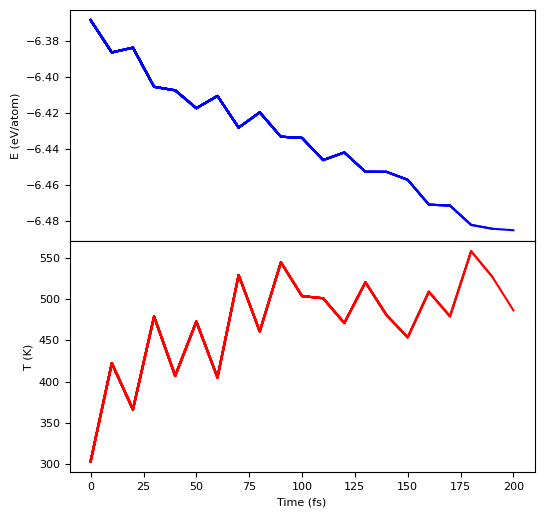

MD finished in 2.01 minutes!


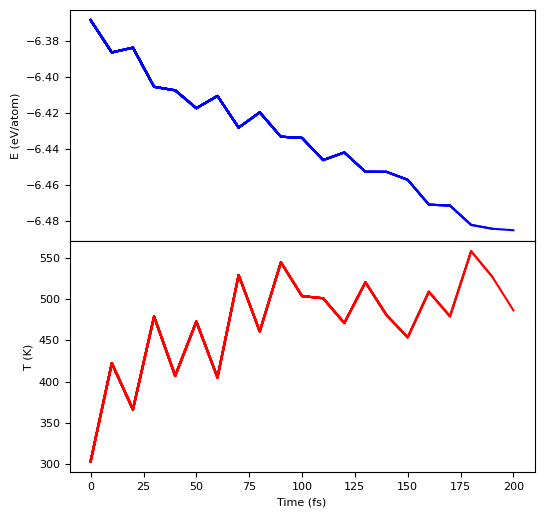

In [10]:
mace_calc = naive_234

simpleMD(Mo_Fe_oct_inv_struct, temp=293.15, calc=mace_calc, fname='macemd_Mo_Fe_oct_inv_struct.xyz', s=10, T=200)

In [ ]:
# reinitialize the original config
ase_atoms_obj = inv_struct

from xtb.ase.calculator import XTB
xtb_calc = XTB(method="GFN2-xTB")

simpleMD(ase_atoms_obj, temp=1200, calc=xtb_calc, fname='moldyn/xtb_md.xyz', s=10, T=200)

To visualize the trajectory here you can use `nglviewer`. 

Alternatively you can use `ovito` through the `Launcher`.